In [1]:
# Use the PRS dataset to create a dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('Final.csv')

In [11]:
# import the visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

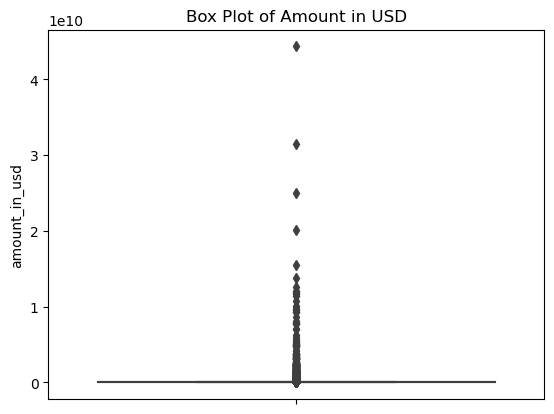

In [12]:
""" Check for the outliers in the “amount_in_usd” column and replace the
outliers with appropriate values, discussed in the sessions."""

sns.boxplot(data=df, y='amount_in_usd')
plt.title('Box Plot of Amount in USD')
plt.show()

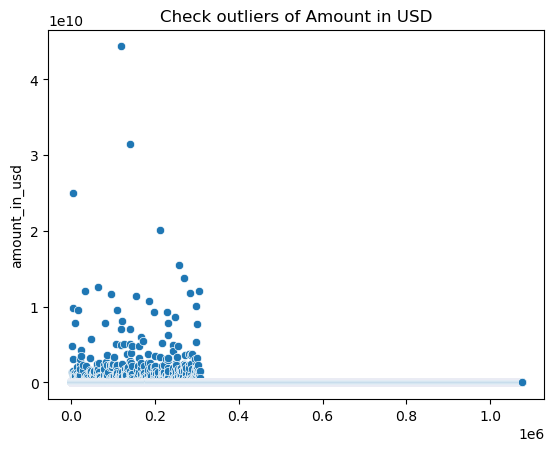

In [13]:
sns.scatterplot(data=df, x=range(len(df)), y='amount_in_usd')
plt.title('Check outliers of Amount in USD')
plt.show()

In [14]:
Q1 = np.percentile(df['amount_in_usd'], 25)
Q3 = np.percentile(df['amount_in_usd'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)

outliers

0          False
1          False
2           True
3          False
4          False
           ...  
1101920     True
1101921    False
1101922    False
1101923    False
1101924     True
Name: amount_in_usd, Length: 1074783, dtype: bool

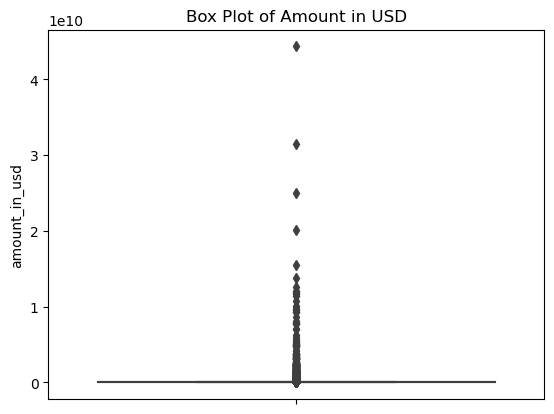

In [15]:
sns.boxplot(data=df, y='amount_in_usd')
plt.title('Box Plot of Amount in USD')
plt.show()

In [16]:
# Label encoding or One hot Encoding on all the categorical columns

from sklearn.preprocessing import LabelEncoder

category=[]
continuous=[]
for i in df.columns:
    if (df[i].dtype=='object' or df[i].dtype=='category'):
        category.append(i)
    elif (df[i].dtype=='float64' or df[i].dtype=='int64'):
        continuous.append(i)
        
print(category)

['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS', 'unique_cust_id']


In [17]:
le=LabelEncoder()
for i in category:
    df[i]=df[i].astype(str)
    df[i]=le.fit_transform(df[i])

df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,954.61,2022-01-13,6,3,12311807,892.158879,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,787.36,2022-01-11,6,3,12311807,735.850467,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,67493.46,2022-01-12,6,2,12118758,63078.000000,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,1405.54,2022-01-06,6,2,1210499770,1313.588785,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.00,2022-01-06,6,1,1210351400,0.000000,2919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,79,1,1,306,4260,2022-06-01,74357,1,946056501,4415.19,2022-06-01,18,3,1210331804,5966.472973,2782
1101921,998890898,4509,10,1,1,306,4260,2022-06-01,84052,3,894775488,0.00,2022-06-01,18,3,1210331804,0.000000,2782
1101922,983330221,3951,151,1,1,306,4260,2022-06-01,85322,0,909729781,0.00,2022-06-01,18,3,1210331811,0.000000,2784
1101923,926668029,3235,167,1,1,306,4260,2022-06-01,90538,7,940836817,0.00,2022-06-01,18,3,1210331811,0.000000,2784


In [18]:
# Log Transformations on continuous columns

cols = ['amount_in_usd', 'RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT']

for col in cols:
    if df[col].dtype in [int, float]:
        df[col] = df[col].apply(lambda x: np.log(x) if x > 0 else x)

df[cols]

,amount_in_usd,RELEASED_CREDIT_VALUE,ORDER_AMOUNT
0,6.793644,0.000000,6.861303
1,6.601027,0.000000,6.668686
2,11.052127,10.680424,11.119786
3,7.180518,8.968524,7.248177
4,0.000000,0.000000,0.000000
...,...,...,...
1101920,8.693911,0.000000,8.392806
1101921,0.000000,0.000000,0.000000
1101922,0.000000,0.000000,0.000000
1101923,0.000000,0.000000,0.000000


In [19]:
# Try to extract new features by grouping existing columns

grouped_data = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_data.columns = ['SALES_ORG', 'AVG_ORDER_AMOUNT', 'TOTAL_CREDIT_VALUE', 'UNIQUE_CUSTOMER', 'MAX_AMOUNT_IN_USD']

grouped_data

,SALES_ORG,AVG_ORDER_AMOUNT,TOTAL_CREDIT_VALUE,UNIQUE_CUSTOMER,MAX_AMOUNT_IN_USD
0,2100,4.483412,336.782176,141,20.113511
1,2101,4.759214,330.482688,129,20.662564
2,2102,4.754755,282.677968,116,15.438588
3,2103,4.686690,279.911595,124,15.551612
4,2104,4.558563,327.817866,137,14.169593
...,...,...,...,...,...
2406,4506,4.881762,288.587931,143,16.039052
2407,4507,4.775988,286.548104,122,21.736027
2408,4508,4.784461,321.872938,139,21.071276
2409,4509,4.749182,259.260909,146,13.765306


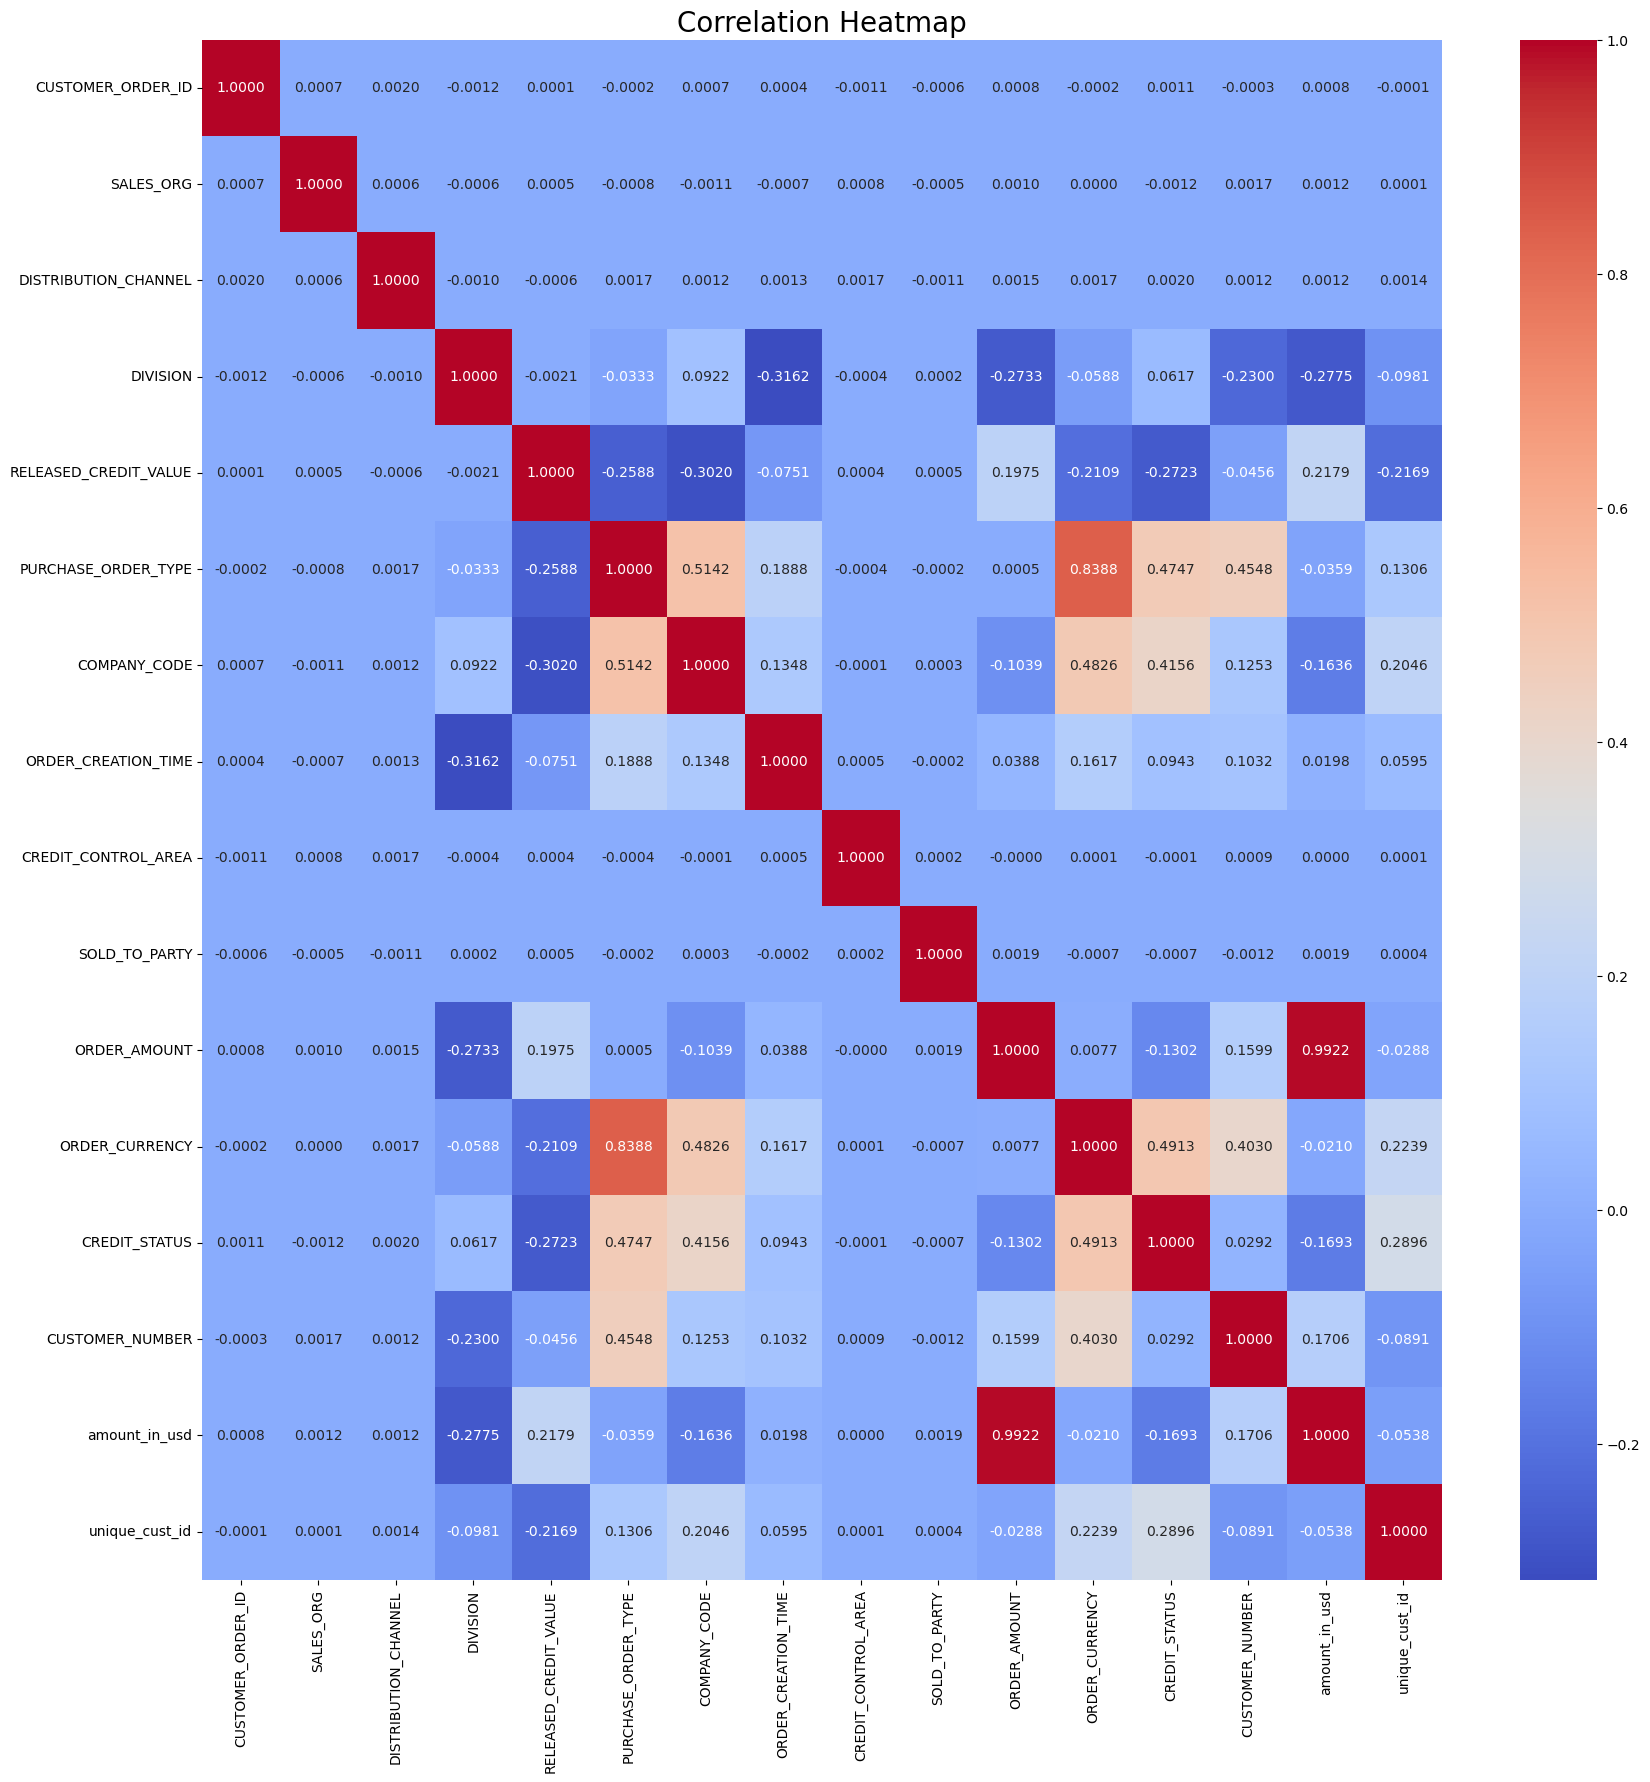

In [20]:
# Create a heatmap to find correlation between the columns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap', fontsize='20')
plt.show()

In [21]:
# Try to identify important or relevant columns for feature extraction.

cmat = df.corr().abs()

threshold = 0.6

high_corr_columns = cmat[cmat > threshold].stack().reset_index()
high_corr_columns = high_corr_columns[high_corr_columns['level_0'] != high_corr_columns['level_1']]

relevant_columns = pd.unique(high_corr_columns[['level_0', 'level_1']].values.ravel('K'))

print(high_corr_columns)

print("\nRelevant Columns:\n",relevant_columns)

                level_0              level_1         0
6   PURCHASE_ORDER_TYPE       ORDER_CURRENCY  0.838794
12         ORDER_AMOUNT        amount_in_usd  0.992201
13       ORDER_CURRENCY  PURCHASE_ORDER_TYPE  0.838794
17        amount_in_usd         ORDER_AMOUNT  0.992201

Relevant Columns:
 ['PURCHASE_ORDER_TYPE' 'ORDER_AMOUNT' 'ORDER_CURRENCY' 'amount_in_usd']
